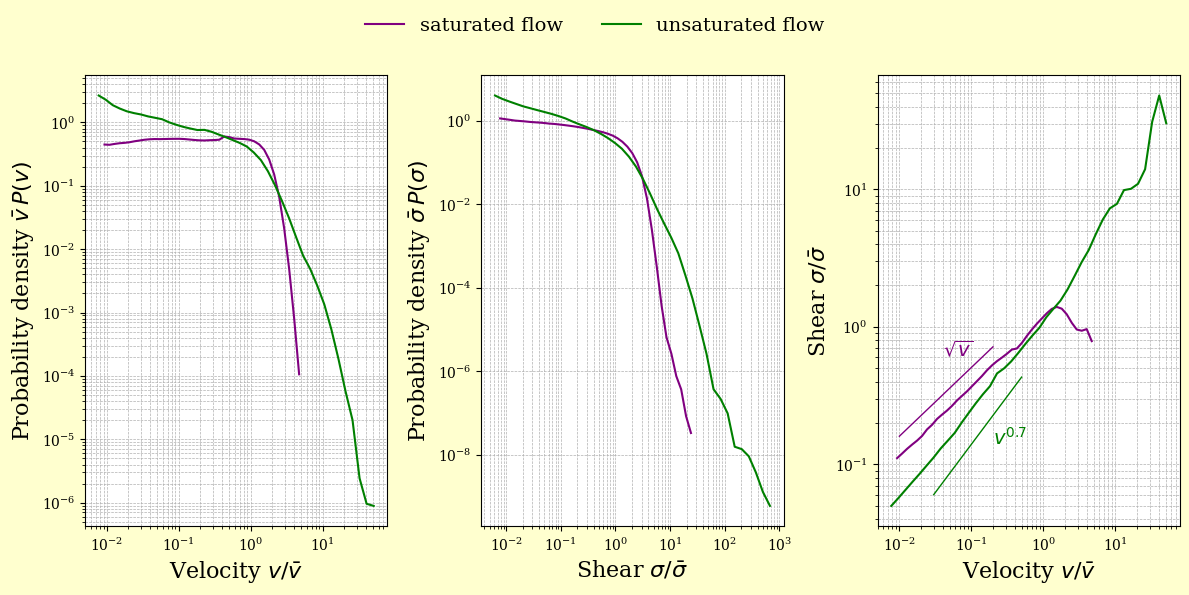

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1) Leer los promedios
# --------------------------------------------------
def read_averages(fname):
    with open(fname) as f:
        lines = [l for l in f if not l.startswith('#')]
    v_av = float(lines[0].split()[1])
    s_av = float(lines[1].split()[1])
    return v_av, s_av

v_av_sat,   s_av_sat   = read_averages("averages_sat.dat")
v_av_unsat, s_av_unsat = read_averages("averages_unsat.dat")

# --------------------------------------------------
# 2) Leer los histogramas
# --------------------------------------------------
# Saturado
v_sat_vals,    histo_v_sat = np.loadtxt(
    "histograma_U_sat.dat",
    unpack=True,
    comments='#'
)
s_sat_vals,    histo_s_sat = np.loadtxt(
    "histograma_shear_sat.dat",
    unpack=True,
    comments='#'
)
_,             shear_v_sat, _ = np.loadtxt(
    "shear_given_v_sat.dat",
    unpack=True,
    comments='#'
)

# No saturado
v_unsat_vals,    histo_v_unsat = np.loadtxt(
    "histograma_U_unsat.dat",
    unpack=True,
    comments='#'
)
s_unsat_vals,    histo_s_unsat = np.loadtxt(
    "histograma_shear_unsat.dat",
    unpack=True,
    comments='#'
)
_,               shear_v_unsat, _ = np.loadtxt(
    "shear_given_v_unsat.dat",
    unpack=True,
    comments='#'
)

# --------------------------------------------------
# 3) Preparar figura con 3 subplots horizontales
# --------------------------------------------------
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Opción B: color de fondo exterior en RGB (255,255,207)
fig.patch.set_facecolor((255/255, 255/255, 207/255))

# Emular estética gnuplot:
for ax in axes:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')

# --------------------------------------------------
# Subplot 1: histogramas de velocidad normalizada
# --------------------------------------------------
lines0 = axes[0].plot(
    v_sat_vals   / v_av_sat,
    v_av_sat * histo_v_sat,
    label="saturated flow",
    color="purple",
    lw=1.5
)
lines0 += axes[0].plot(
    v_unsat_vals / v_av_unsat,
    v_av_unsat * histo_v_unsat,
    label="unsaturated flow",
    color="green",
    lw=1.5
)
axes[0].set_xlabel("Velocity $v/\\bar{v}$", fontsize=16)
axes[0].set_ylabel("Probability density $\\bar{v}\\,P(v)$", fontsize=16)

# --------------------------------------------------
# Subplot 2: histogramas de shear normalizada
# --------------------------------------------------
axes[1].plot(
    s_sat_vals   / s_av_sat,
    s_av_sat * histo_s_sat,
    color="purple",
    lw=1.5
)
axes[1].plot(
    s_unsat_vals / s_av_unsat,
    s_av_unsat * histo_s_unsat,
    color="green",
    lw=1.5
)
axes[1].set_xlabel("Shear $\\sigma/\\bar{\\sigma}$", fontsize=16)
axes[1].set_ylabel("Probability density $\\bar{\\sigma}\\,P(\\sigma)$", fontsize=16)

# --------------------------------------------------
# Subplot 3: shear dado v (normalizado)
# --------------------------------------------------
axes[2].plot(
    v_sat_vals   / v_av_sat,
    shear_v_sat   / s_av_sat,
    color="purple",
    lw=1.5
)
axes[2].plot(
    v_unsat_vals / v_av_unsat,
    shear_v_unsat / s_av_unsat,
    color="green",
    lw=1.5
)
axes[2].set_xlabel("Velocity $v/\\bar{v}$", fontsize=16)
axes[2].set_ylabel("Shear $\\sigma/\\bar{\\sigma}$", fontsize=16)

# --------------------------------------------------
# Añadir segmentos-guía y etiquetas
# --------------------------------------------------
# Para 'sqrt(v)' junto a la curva saturada
x1, x2 = 0.01, 0.2
y1, y2 = 1.6*(x1)**0.5, 1.6*(x2)**0.5
axes[2].plot([x1, x2], [y1, y2], color='purple', lw=1)
axes[2].text(0.2*x2, 0.8*y2,
             r'$\sqrt{v}$', color='purple',
             fontsize=14, va='bottom')

# Para 'v^0.7' junto a la curva no saturada
u1, u2 = 0.03, 0.5 
w1, w2 = 0.7*(u1)**0.7, 0.7*(u2)**0.7
axes[2].plot([u1, u2], [w1, w2], color='green', lw=1)
axes[2].text(0.4*u2 , 0.3*w2,
             r'$v^{0.7}$', color='green',
             fontsize=14, va='bottom')


# --------------------------------------------------
# Leyenda global (solo una vez, con las dos líneas del primer subplot)
# --------------------------------------------------
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.90])
fig.savefig("plot.pdf", format="pdf", dpi=600, bbox_inches="tight")
plt.show()
